In [1]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_excel
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# b) Load dataset
filename = r'Real estate valuation data set.xlsx'
names = ['no', 'trans-date' , 'house-age' , 'distance-to-MRX' , 'num-conv' , 'longitude', 'latitude', 'price' ]
dataset = read_excel(filename, names=names)

(414, 8)
    no   trans-date  house-age  distance-to-MRX  num-conv  longitude  \
0    1  2012.916667       32.0         84.87882        10   24.98298   
1    2  2012.916667       19.5        306.59470         9   24.98034   
2    3  2013.583333       13.3        561.98450         5   24.98746   
3    4  2013.500000       13.3        561.98450         5   24.98746   
4    5  2012.833333        5.0        390.56840         5   24.97937   
5    6  2012.666667        7.1       2175.03000         3   24.96305   
6    7  2012.666667       34.5        623.47310         7   24.97933   
7    8  2013.416667       20.3        287.60250         6   24.98042   
8    9  2013.500000       31.7       5512.03800         1   24.95095   
9   10  2013.416667       17.9       1783.18000         3   24.96731   
10  11  2013.083333       34.8        405.21340         1   24.97349   
11  12  2013.333333        6.3         90.45606         9   24.97433   
12  13  2012.916667       13.0        492.23130        

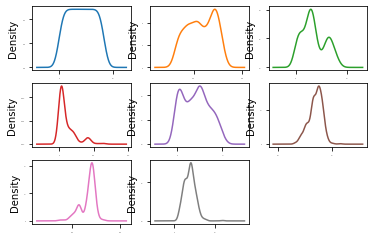

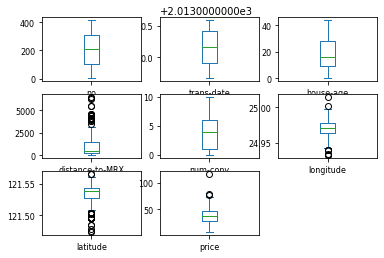

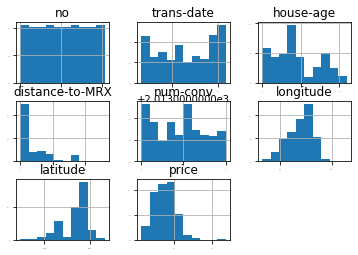

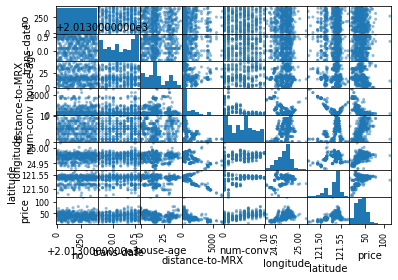

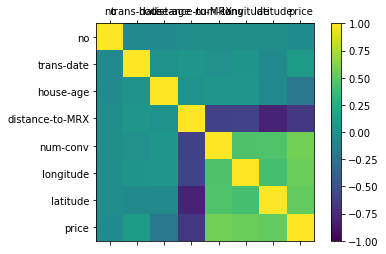

In [2]:
# 2. Summarize Data
# a) Descriptive statistics

# Dimensions
print(dataset.shape)

# Peep through the data
print(dataset.head(15))
print(dataset.dtypes)

# Statistical descriptions
set_option('precision', 1)
print(dataset.describe())

set_option('precision', 2)
print(dataset.corr(method='pearson'))

# Class distributions
#print(dataset.groupby('class').size())


# b) Data visualizations

# Univariate plots: box and whisker plots
dataset.plot(kind='density' , subplots=True, layout=(3,3), sharex=False, legend=False, fontsize=1)
pyplot.show()

dataset.plot(kind='box' , subplots=True, layout=(3,3), sharex=False, legend=False, fontsize=8)
pyplot.show()

# Univariate plots: histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

# Multivariate plots: scatter matrix
scatter_matrix(dataset)
pyplot.show()

#correlation matric
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none' )
fig.colorbar(cax)
ticks = numpy.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()


In [3]:
# 3. Prepare Data
# a) Data Cleaning

# b) Feature Selection

# c) Data Transforms


ScaledLR: -0.000000 (0.000000)
ScaledLASSO: -1.031092 (0.355505)
ScaledEN: -24.447532 (14.137326)
ScaledKNN: -32.731183 (18.933095)
ScaledCART: -5.699135 (9.300465)
ScaledSVR: -57.752120 (40.699140)


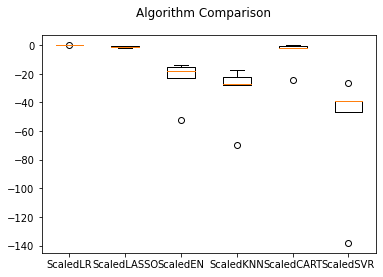

In [22]:
# 4. Evaluate Algorithms
# a) Split-out validation dataset
array = dataset.to_numpy()
X = array[:,0:8]
Y = array[:,7]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# b) Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'


# c) Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO' , Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN' , KNeighborsRegressor()))
models.append(('CART' , DecisionTreeRegressor()))
models.append(('SVR' , SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in pipelines: #models:
    kfold = KFold(n_splits=num_folds) #, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# d) Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [34]:
# 5. Improve Accuracy

# a) Standardize Dataset
pipelines = []
pipelines.append( ('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])) )
pipelines.append( ('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])) )
pipelines.append( ('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])) )
pipelines.append( ('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])) )
pipelines.append( ('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART' , DecisionTreeRegressor())])) )
pipelines.append( ('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR' , SVR())])) )


# b) Algorithm Tuning

# KNN Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = arange(1,22,2)
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Print best KNN result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score' ]
stds = grid_result.cv_results_['std_test_score' ]
params = grid_result.cv_results_['params' ]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# c) Ensembles


Best: -32.802212 using {'n_neighbors': 5}
-37.784385 (19.221387) with: {'n_neighbors': 1}
-33.514073 (22.497807) with: {'n_neighbors': 3}
-32.802212 (19.637675) with: {'n_neighbors': 5}
-35.794037 (21.179642) with: {'n_neighbors': 7}
-37.391663 (22.422998) with: {'n_neighbors': 9}
-38.160435 (23.077734) with: {'n_neighbors': 11}
-38.807823 (22.691017) with: {'n_neighbors': 13}
-40.058760 (22.848653) with: {'n_neighbors': 15}
-41.135552 (23.302337) with: {'n_neighbors': 17}
-42.299557 (23.919642) with: {'n_neighbors': 19}
-43.000560 (24.815691) with: {'n_neighbors': 21}


In [31]:
# 6. Finalize Model
# a) Predictions on validation dataset



# b) Create standalone model on entire training dataset


# c) Save model for later use

In [30]:
arange(1, 22, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])